### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
data=pd.read_csv('PHQ-9_Dataset_5th Edition.csv')

In [3]:
data.head()

,Age,Gender,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep, or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself—or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed? Or the opposite—being so fidgety or restless that you have been moving around a lot more than usual,Thoughts that you would be better off dead or of hurting yourself in some way,PHQ_Total,PHQ_Severity,Sleep Quality,Study Pressure,Financial Pressure
0,22,Male,More than half the days,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,More than half the days,Not at all,4,Minimal,Good,Good,Average
1,25,Male,Not at all,Not at all,Nearly every day,Nearly every day,Nearly every day,Not at all,More than half the days,More than half the days,More than half the days,15,Moderately severe,Worst,Bad,Average
2,22,Female,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Several days,Not at all,Not at all,1,Minimal,Average,Bad,Average
3,18,Female,Nearly every day,Nearly every day,Not at all,Nearly every day,More than half the days,Not at all,Not at all,Not at all,Not at all,11,Moderate,Average,Bad,Worst
4,24,Male,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,More than half the days,Not at all,2,Minimal,Good,Average,Good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 16 columns):
 #   Column                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                    --------------  ----- 
 0   Age                                                                                                                                                                       682 non-null    int64 
 1   Gender                                                                                                                                                                    682 non-null    object
 2   Little interest or pleasure in doing things                                                       

In [5]:
data.isnull().sum()

Age                                                                                                                                                                         0
Gender                                                                                                                                                                      0
Little interest or pleasure in doing things                                                                                                                                 0
  Feeling down, depressed, or hopeless                                                                                                                                      0
  Trouble falling or staying asleep, or sleeping too much                                                                                                                   0
  Feeling tired or having little energy                                                                                           

In [6]:
data.columns

Index(['Age', 'Gender', 'Little interest or pleasure in doing things ',
       '  Feeling down, depressed, or hopeless  ',
       '  Trouble falling or staying asleep, or sleeping too much  ',
       '  Feeling tired or having little energy  ',
       '  Poor appetite or overeating  ',
       'Feeling bad about yourself—or that you are a failure or have let yourself or your family down  ',
       'Trouble concentrating on things, such as reading the newspaper or watching television  ',
       'Moving or speaking so slowly that other people could have noticed? Or the opposite—being so fidgety or restless that you have been moving around a lot more than usual  ',
       'Thoughts that you would be better off dead or of hurting yourself in some way  ',
       'PHQ_Total', 'PHQ_Severity', 'Sleep Quality', 'Study Pressure',
       'Financial Pressure'],
      dtype='object')

In [7]:
# Rename columns to shorter, more manageable names
data.columns = ['Age', 'Gender', 'Interest_Pleasure', 'Feeling_Down', 
                'Sleep_Trouble', 'Tired_Low_Energy', 'Appetite_Issues',
                'Feeling_Bad_About_Self', 'Concentration_Trouble', 
                'Moving_Speaking_Issues', 'Thoughts_Self_Harm',
                'PHQ_Total', 'PHQ_Severity', 'Sleep_Quality', 
                'Study_Pressure', 'Financial_Pressure']


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     682 non-null    int64 
 1   Gender                  682 non-null    object
 2   Interest_Pleasure       682 non-null    object
 3   Feeling_Down            682 non-null    object
 4   Sleep_Trouble           682 non-null    object
 5   Tired_Low_Energy        682 non-null    object
 6   Appetite_Issues         682 non-null    object
 7   Feeling_Bad_About_Self  682 non-null    object
 8   Concentration_Trouble   682 non-null    object
 9   Moving_Speaking_Issues  682 non-null    object
 10  Thoughts_Self_Harm      682 non-null    object
 11  PHQ_Total               682 non-null    int64 
 12  PHQ_Severity            682 non-null    object
 13  Sleep_Quality           682 non-null    object
 14  Study_Pressure          682 non-null    object
 15  Financ

### EDA

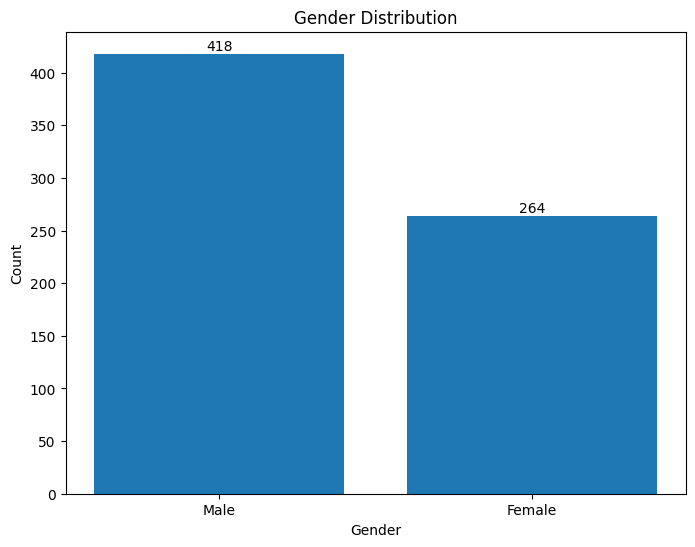

In [9]:
# Show gender distribution
import matplotlib.pyplot as plt

gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add numbers at the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.show()

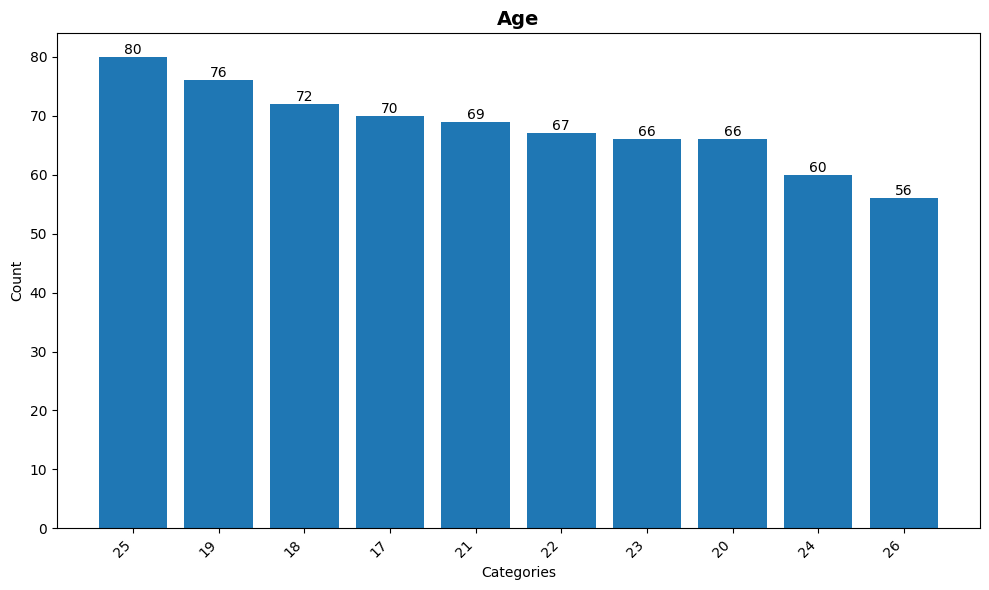

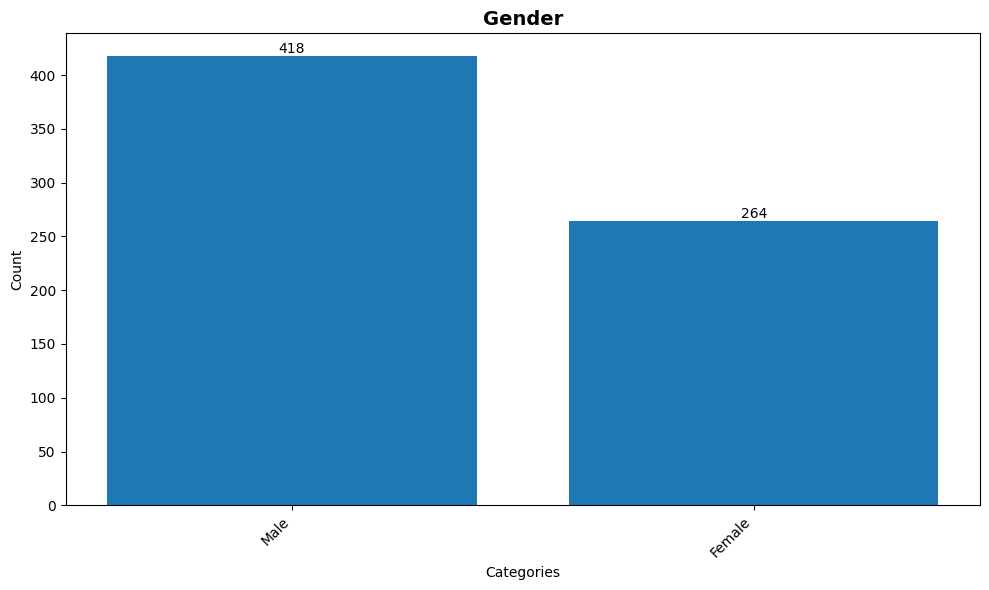

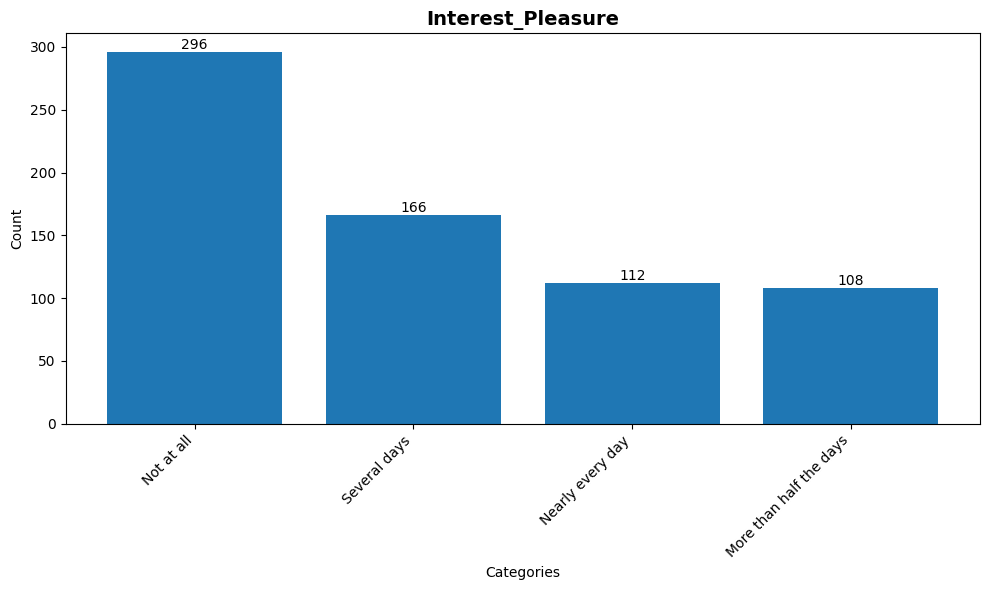

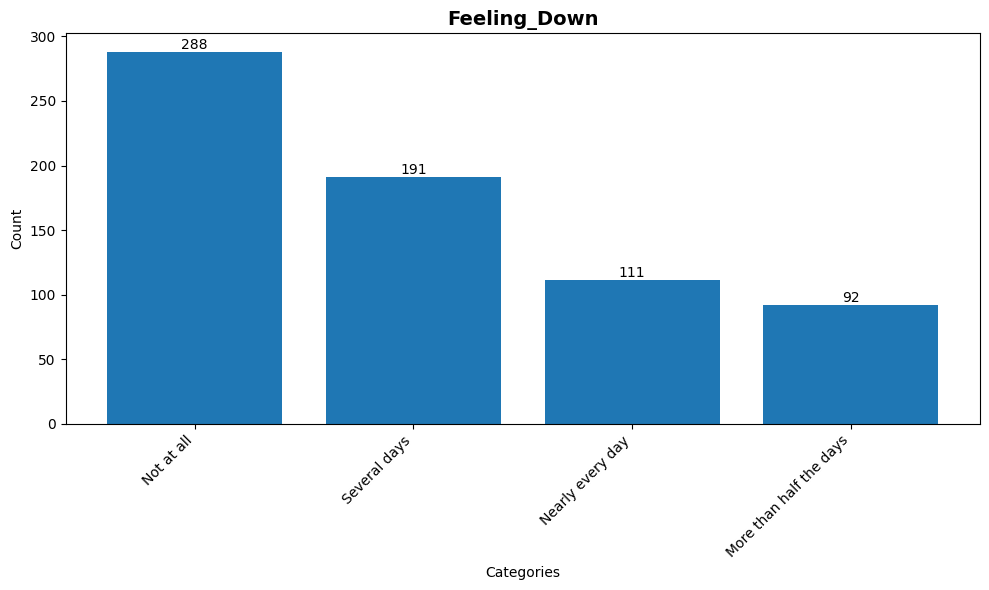

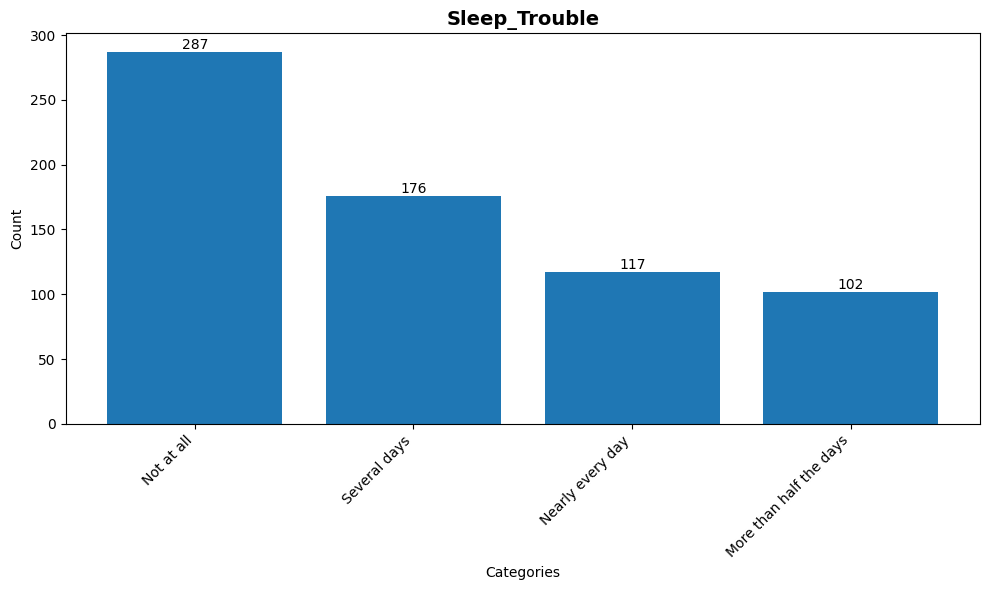

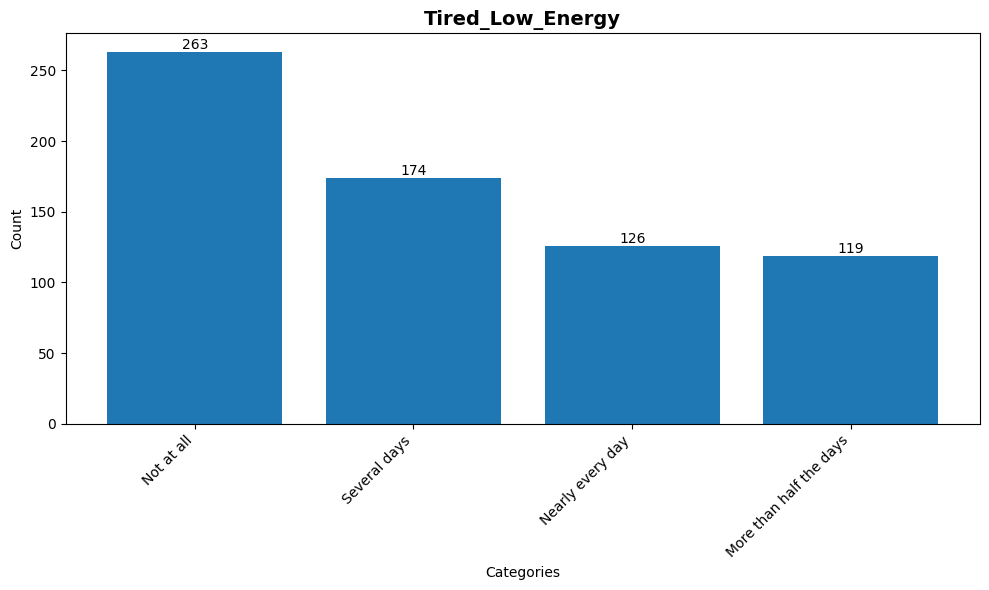

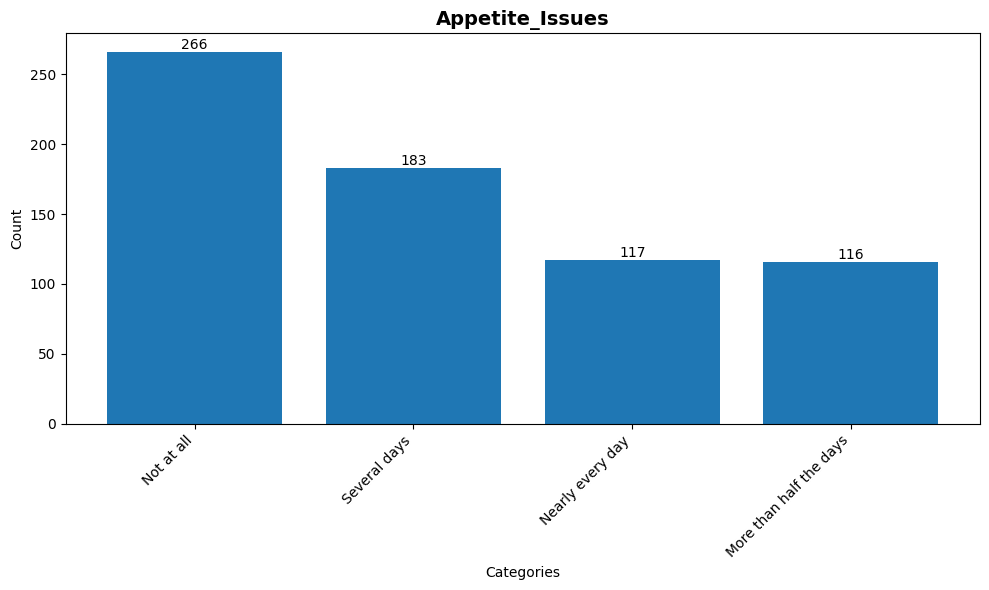

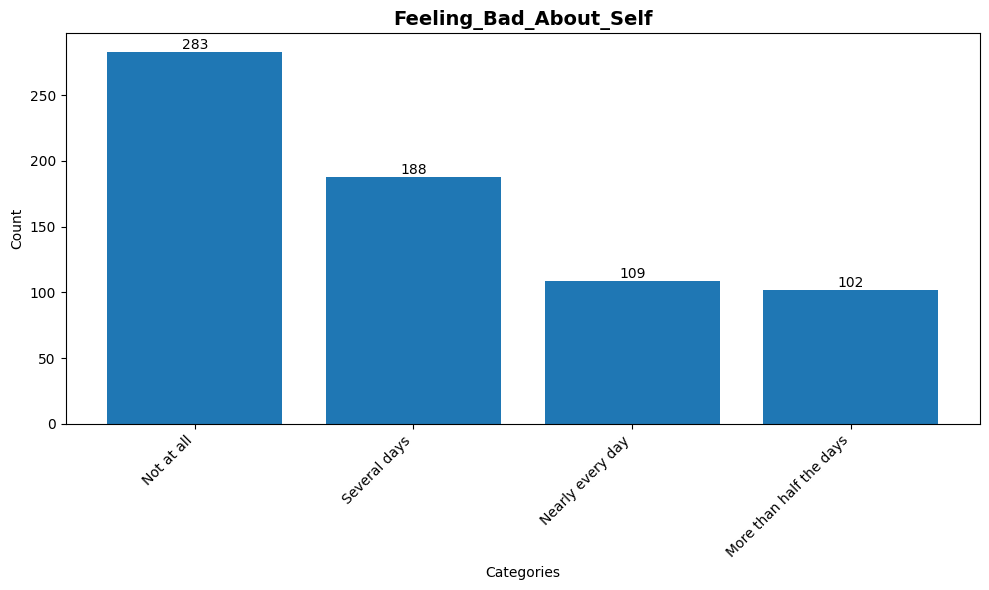

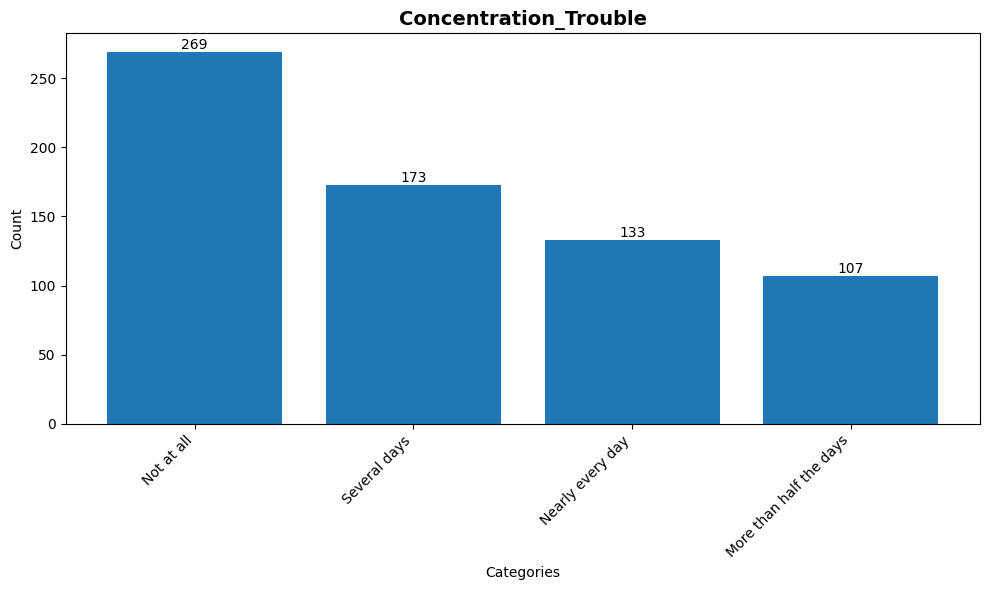

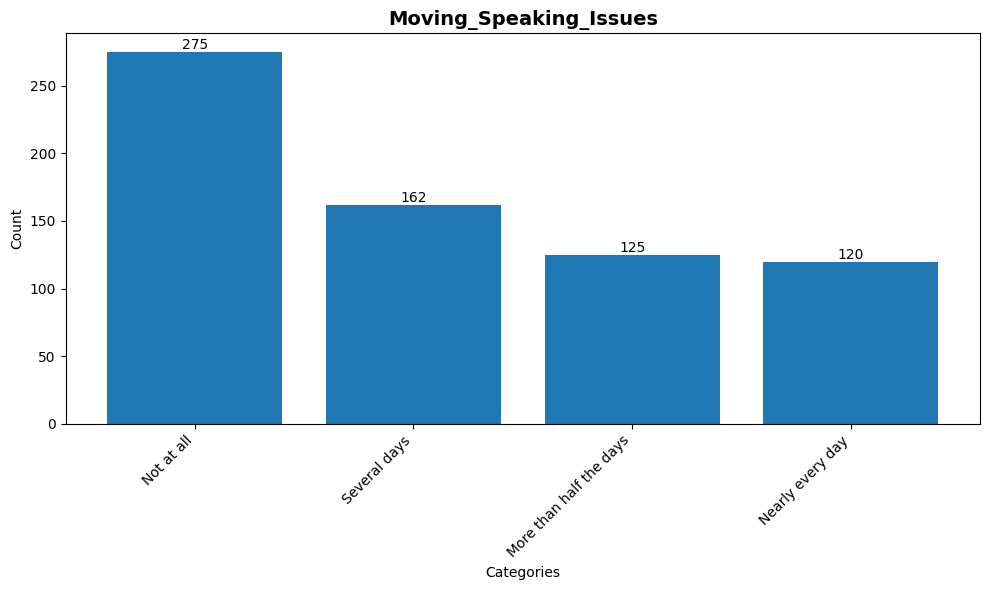

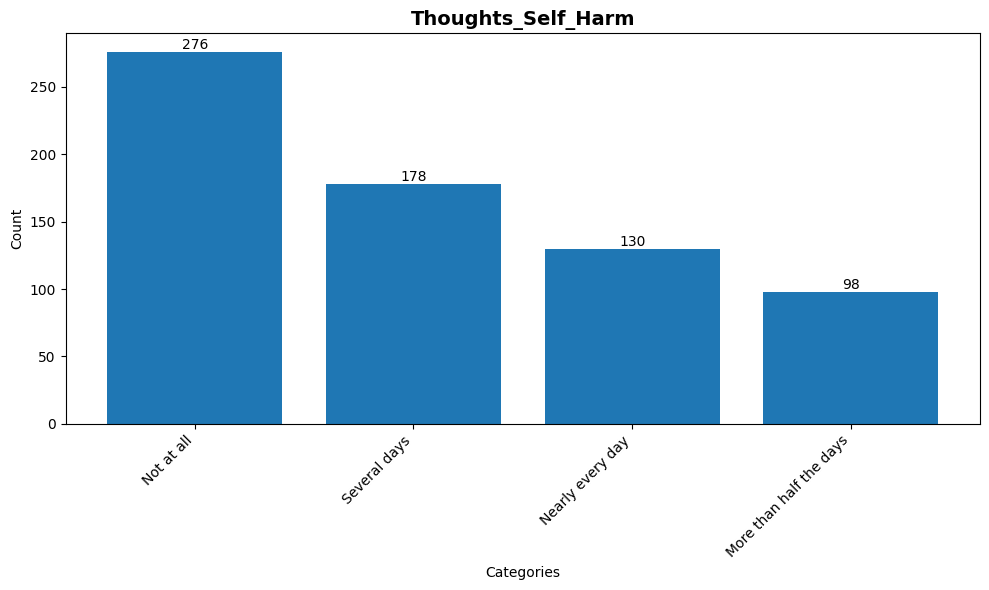

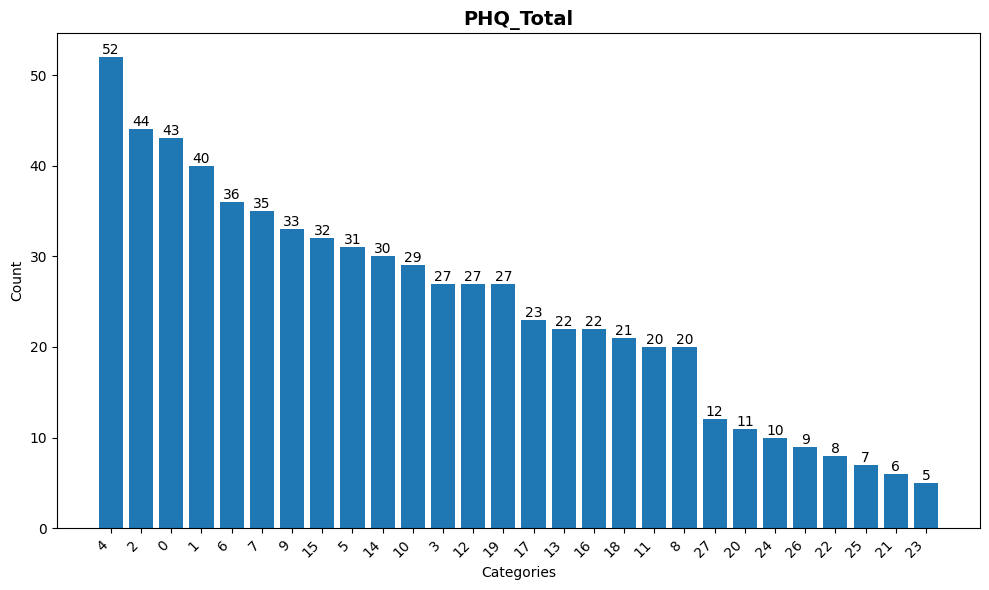

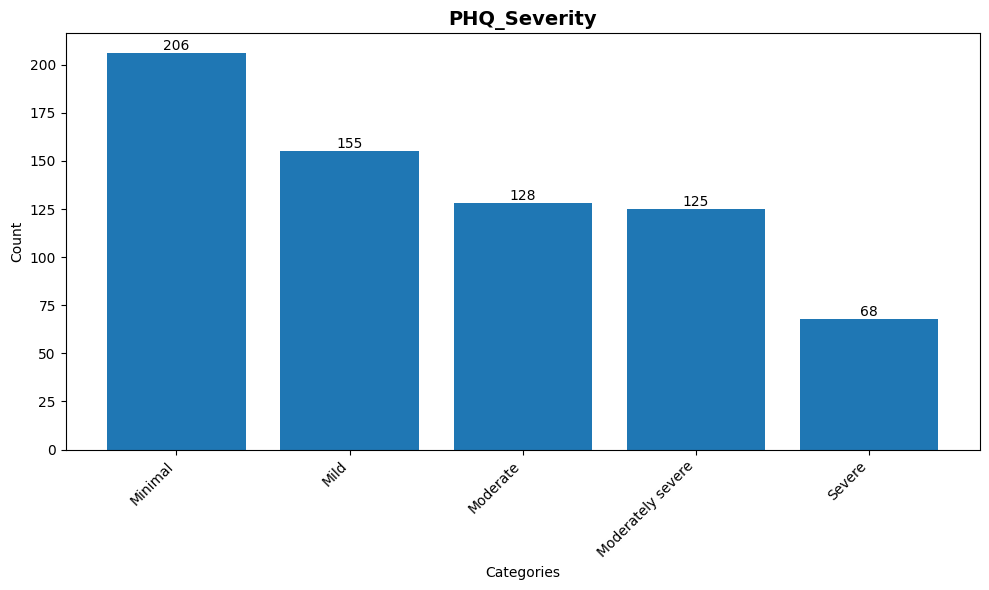

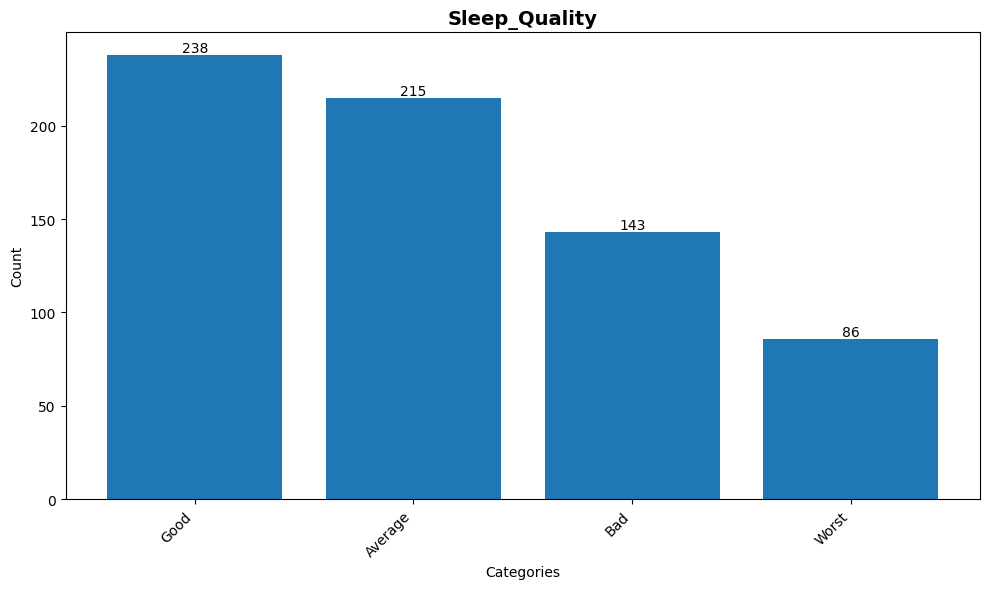

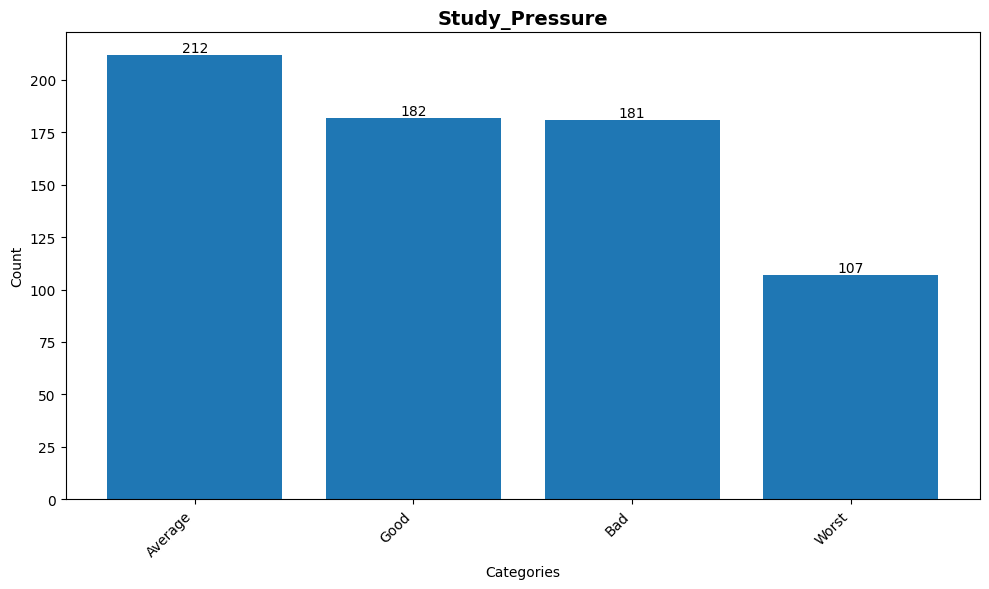

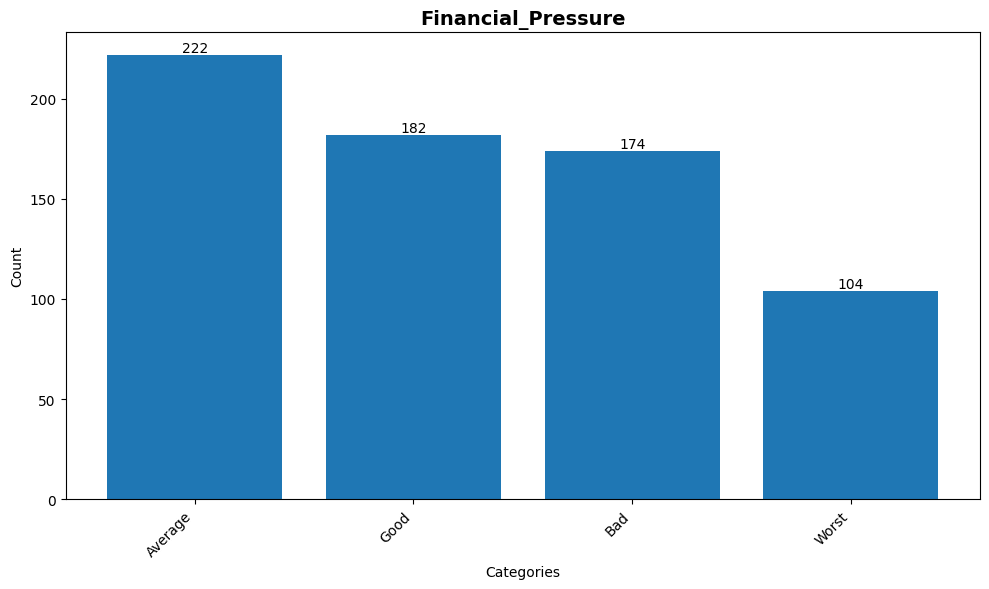

In [10]:
# Create count plots for all columns in the dataset - each in separate diagrams
import matplotlib.pyplot as plt
import seaborn as sns

# Get all column names
columns = data.columns.tolist()

# Create separate plot for each column
for column in columns:
    plt.figure(figsize=(10, 6))
    
    # Get value counts
    value_counts = data[column].value_counts()
    
    # Create bar plot
    bars = plt.bar(range(len(value_counts)), value_counts.values)
    plt.title(f'{column}', fontsize=14, fontweight='bold')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    
    # Set x-axis labels
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
    
    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


In [11]:
data.isnull().sum()

Age                       0
Gender                    0
Interest_Pleasure         0
Feeling_Down              0
Sleep_Trouble             0
Tired_Low_Energy          0
Appetite_Issues           0
Feeling_Bad_About_Self    0
Concentration_Trouble     0
Moving_Speaking_Issues    0
Thoughts_Self_Harm        0
PHQ_Total                 0
PHQ_Severity              0
Sleep_Quality             0
Study_Pressure            0
Financial_Pressure        0
dtype: int64

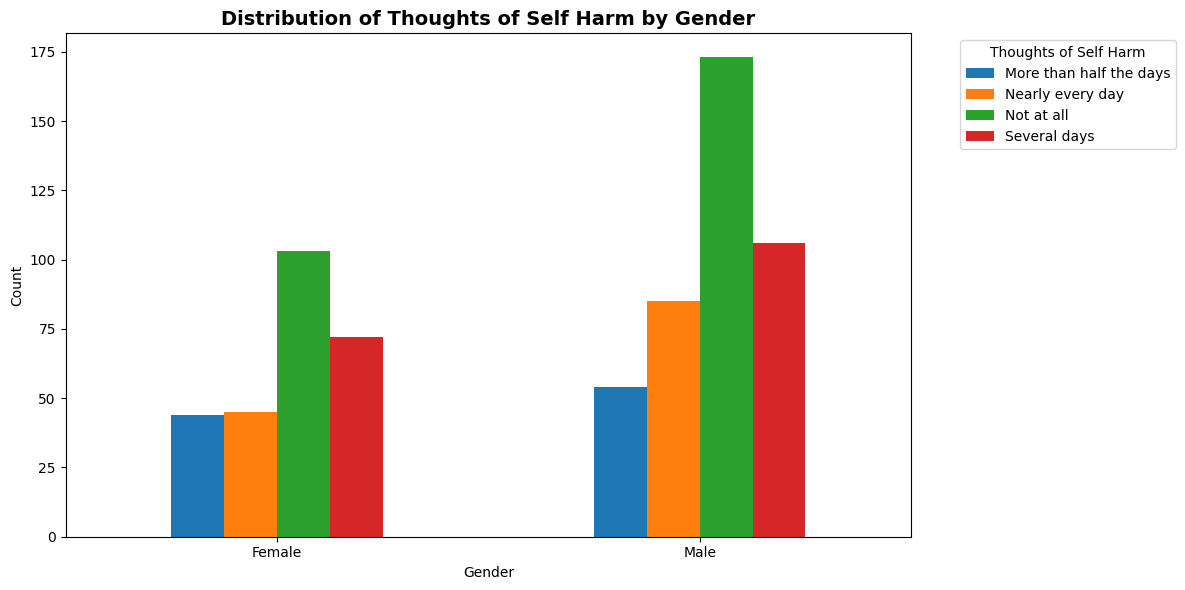

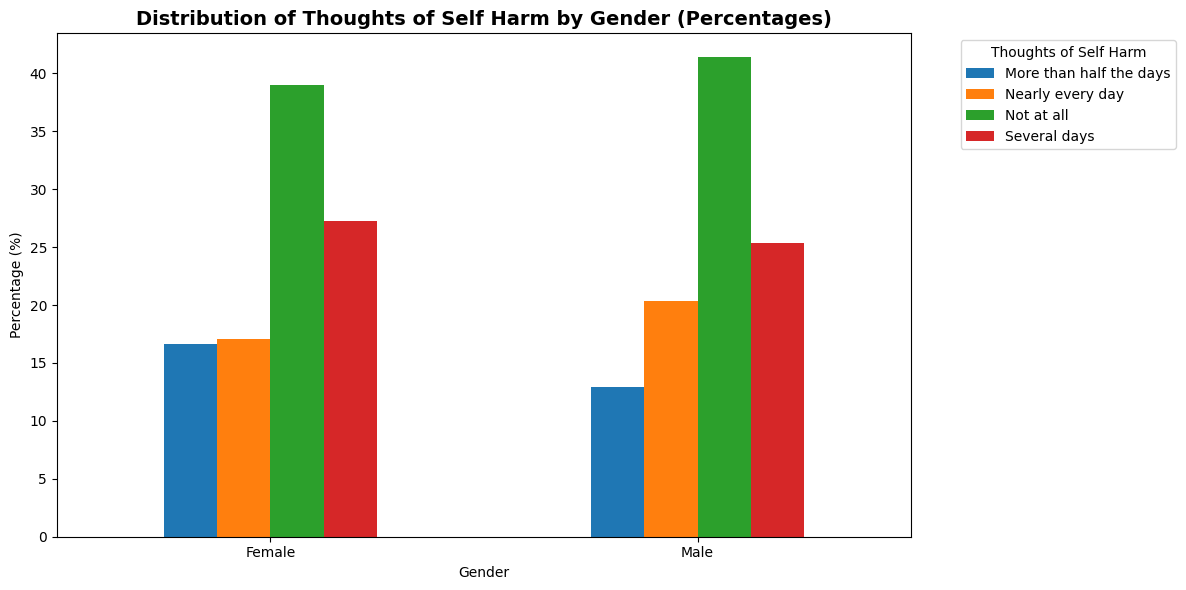

Cross-tabulation of Thoughts of Self Harm by Gender:
Thoughts_Self_Harm  More than half the days  Nearly every day  Not at all  \
Gender                                                                      
Female                                   44                45         103   
Male                                     54                85         173   

Thoughts_Self_Harm  Several days  
Gender                            
Female                        72  
Male                         106  

Percentages within each gender:
Thoughts_Self_Harm  More than half the days  Nearly every day  Not at all  \
Gender                                                                      
Female                                16.67             17.05       39.02   
Male                                  12.92             20.33       41.39   

Thoughts_Self_Harm  Several days  
Gender                            
Female                     27.27  
Male                       25.36  


In [13]:
# Distribution of thoughts of self harm between men and women
import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross-tabulation using the renamed column
cross_tab = pd.crosstab(data['Gender'], data['Thoughts_Self_Harm'])

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar', ax=plt.gca())
plt.title('Distribution of Thoughts of Self Harm by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Thoughts of Self Harm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Also show as percentages within each gender
plt.figure(figsize=(12, 6))
cross_tab_pct = pd.crosstab(data['Gender'], data['Thoughts_Self_Harm'], normalize='index') * 100
cross_tab_pct.plot(kind='bar', ax=plt.gca())
plt.title('Distribution of Thoughts of Self Harm by Gender (Percentages)', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.legend(title='Thoughts of Self Harm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print the actual numbers
print("Cross-tabulation of Thoughts of Self Harm by Gender:")
print(cross_tab)
print("\nPercentages within each gender:")
print(cross_tab_pct.round(2))
